# Lab 5 : Clustering Part 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


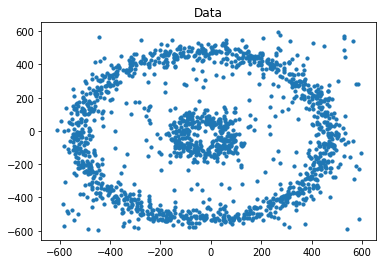

In [28]:
#DBSCAN
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
#np.random.seed(42)
colors = ['r','b','g','y']
markers = ['*','x','.','+']
def Circle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]
#data generation
# Creating data points in the form of a circle
df=pd.DataFrame(Circle(500,1000))
df=df.append(Circle(100,300))
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.scatter(df[0],df[1],s=10)
plt.title('Data')
plt.show()

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

(1600, 2)
[1, 1, -1, 5, 2, 6, 5, 1, 5, -1, 4, 5, 4, 2, -1, 6, -1, -1, 9, 6, 9, -1, 1, 5, 9, -1, 9, -1, 5, 9, -1, 12, 12, 12, -1, 9, -1, 12, 9, 14, -1, 15, 12, 15, 15, 16, 9, -1, 15, 16, 12, 12, 12, 15, -1, 17, 14, 16, -1, 12, 17, -1, -1, 19, 19, 16, 17, 20, 20, 20, 20, 17, 17, 20, 19, -1, -1, 16, 22, 17, 19, 20, -1, 23, 22, 23, 22, 20, 22, 22, 22, -1, 20, 23, -1, 23, 20, -1, 23, 23, 25, -1, 27, 28, 28, -1, 29, 28, 29, 28, 28, 29, 28, 27, 31, 28, 29, 25, 29, -1, 31, 31, 31, -1, -1, 31, 33, 29, 28, 28, -1, 28, -1, 33, -1, 33, 33, 31, 39, -1, 28, -1, 33, 33, -1, -1, 39, 33, 38, 39, -1, 39, 39, 40, 40, 39, 38, 39, 40, -1, 33, -1, -1, 39, 39, 39, 38, 43, -1, -1, 43, 42, 43, 42, 43, 40, 43, 43, 44, 42, 43, 43, -1, 46, 43, 46, 43, 43, 42, 44, 43, -1, -1, 46, 45, 46, 44, 44, 46, 47, 46, 42, 48, 47, 48, 49, 49, 49, 50, 46, 46, 45, 45, 48, 49, 50, 46, 51, 47, 51, -1, 52, -1, 51, 54, -1, 48, 50, 51, 56, 50, 52, -1, 52, 56, -1, 52, 52, 57, 52, 57, 54, 57, 54, -1, 54, 54, -1, 56, 57, -1, 52, 60, -1

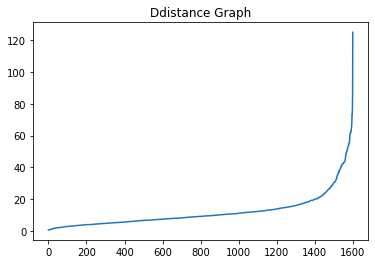

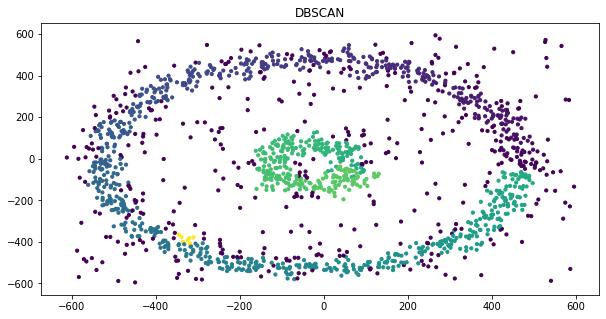

In [36]:
#DBSCAN Algorithm
eps = 30
minpts = 6
x = np.array(df)
D = x
print(x.shape)
def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*x.shape[0]
C = 1
for p in range(x.shape[0]):
    if labels[p]==0:
        labels = update_labels(x,p,eps,labels,C)
        C= C+1
print(labels)

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Ddistance Graph')

plt.show()

plt.subplots(figsize=(10,5))
plt.scatter(x[:,0],x[:,1],c=labels,s=10,cmap = 'viridis');
plt.title("DBSCAN")
plt.show()

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

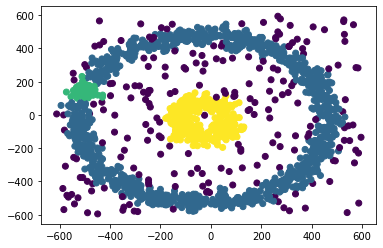

In [40]:
data = np.array(df)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 30,min_samples=6).fit(data)
labels = dbscan.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
labels = gm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels)


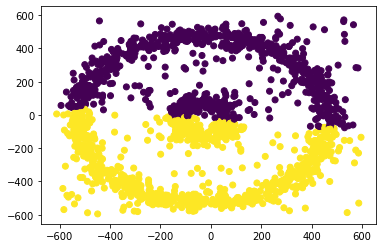

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
y = kmeans.fit_predict(data)
lbl = kmeans.predict(data)
plt.scatter(data[:,0],data[:,1],c=labels)


# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [3]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat

def combine(X):
  D_mat = Dist_mat(X)
  maxPossVal =np.inf
  D_mat[(D_mat==0)]=maxPossVal
  print(D_mat)
  minArr = np.min(D_mat, axis=0)
  #print(minArr)
  loc=np.argwhere(D_mat == np.min(minArr))
  loc=loc[0,:]
  #print(loc)
  print('Vector of X to be combined: ', loc+1)

  cluster_comb.append(loc+1)
  #print(loc[1])
  retendedX = X
  retendedX = np.delete(retendedX,max(loc),1)
  retendedX[:,min(loc)] = 0.5*(X[:,loc[0]]+X[:,loc[1]])
  

  newX = retendedX
  #print(newX)

  return newX


In [4]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

cluster_comb=[]
X1=X
print(X)
while X1.shape!=(2,1):
  X1 = combine(X1)

  print('\nMean of clusters after every iteration: \n\n',X1)


print('\ncluster combination order: \n\n',cluster_comb)

## velidate from inbuilt Dendogram

import plotly.figure_factory as ff



lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3 4]

Mean of clusters after every iteration: 

 [[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2 3]

Mean of clusters after every iteration: 

 [[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[3.5625]
 [2.875 ]]

cluster combination order: 

 [array([1, 2]), array([3, 4]), array([2, 3]), array([1, 2])]


## Divisive clustering:

It is a top down approach of hierarchial clustering



1.   Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.

$$Diameter_{cluster}=\max_{i,j}||x_{i}-x_{j}||_{2}$$

$i,j$ will move over all the elements in the cluster.

2.  find the splinter element of the cluster by using the maximum average distance between the other elements. 
$$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
$splinter-group-element=arg \max_{1 \leq k \leq N} (d_{k})$

repeat the same and assign element to the splinter group untill the differance between average incluster distance and average splinter group distance of each element turns negative.

$$d_{avgsplint_{k}}=\frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

Stop: $$d_{k}-d_{avgsplint_{k}}<0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill each cluster have only one element.

 4. Plot the cluster split with respect to their diameter









In [5]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat


def avg_distance(X):
  Dis_mat=Dist_mat(X)
  D_mat=Dis_mat
  return (np.sum(D_mat,axis=0))/(D_mat.shape[0]-1)

In [6]:
def get_diameter(X, i):
    """Returns the diameter of the ith cluster in X"""
    cluster = np.array(X[i])
    diameter = 0.0
    #print(f'Cluster shape is: {cluster.shape}')
    if cluster.shape[1] == 1: # return 0 if there is only one point in the cluster
        return diameter
    
    for i in range(cluster.shape[1]):
        for j in range(i+1, cluster.shape[1]):
            dist = round(Euclidian_Dist(cluster[:, i], cluster[:, j]), 1)
            if dist > diameter: # Store the max distance b/w any two points in the cluster as diameter
                diameter = dist
    return diameter

def get_biggest_cluster(X):
    """ Returns the cluster index having largest diameter"""
    num_clusters = len(X)
    if num_clusters == 1:
        return 0
    max_distances = np.zeros((num_clusters))
    for i in range(num_clusters):
        max_distances[i] = get_diameter(X, i)
    max_cluster_ind = np.argmax(max_distances) # index having max diameter
    return max_cluster_ind

def avg_spl_dists(cluster, splinter):
    """ Return the average of distances of each point belonging to cl wrt splinter"""
    avg_dists = np.zeros((cluster.shape[1]))
    for i in range(cluster.shape[1]):
        dist = 0.0
        for j in range(splinter.shape[1]):
            dist += round(Euclidian_Dist(cluster[:,i], splinter[:, j]), 1)
        avg_dists[i] = dist / splinter.shape[1]
    return avg_dists

In [7]:
# Implement Divisive Clustering 
import numpy as np
X = np.array([[1,1], [2,1], [5,4], [6,5], [6.5,6]])
X = X.transpose() # Shape after transpose: [2, 5]
num_points = X.shape[1]
print(f'X:\n {X}')

clusters = [X] # List containing the clusters. (only one cluster to begin with)
print(f'Initial Number of clusters: {len(clusters)}')
iter_num = 1
while(len(clusters) != num_points):
    print(f'---------------- Iteraion - {iter_num} -------------------')
    # single iteration of divisive clustering
    biggest_cluster_ind = get_biggest_cluster(clusters) # Choose the cluster having largest diameter from the list of clusters
    print(f'Biggest cluster ind is: {biggest_cluster_ind}')
    biggest_cluster = clusters[biggest_cluster_ind] # The cluster with largest diameter
    print(f'Biggest Cluster is: \n {biggest_cluster}')
    # Split the biggest cluster into two sub clusters: cluster and splinter
    cluster = biggest_cluster
    avg_distances = avg_distance(cluster)
    #print(f'Avg distance: {avg_distances}')
    max_index = np.argmax(avg_distances)
    print(max_index)
    splinter = np.array([cluster[:, max_index]]).transpose() # First member of the splinter group
    cluster = np.delete(cluster, max_index, 1) # Remove the above member from the cluster, as added to splinter now
    print(f'Cluster: \n {cluster} \n Shape: {cluster.shape}')
    print(f'Splinter: \n {splinter} \n Shape: {splinter.shape}')
    
    while(True):
        if cluster.shape[1] == 1:
            break
        avg_self_dists = avg_distance(cluster)
        avg_splinter_dists = avg_spl_dists(cluster, splinter)
        diff = avg_self_dists - avg_splinter_dists
        #print(f'Distances are:\n {avg_self_dists}, {avg_splinter_dists}, {diff}')
        max_diff = np.max(diff)
        if max_diff < 0:
            break
        else: # max_diff > 0 implies a point is more inclined towards splinter than the cluster
            max_diff_ind = np.argmax(diff) # Choose the member having maximum difference and move it to the splinter group
            new_mem = np.array([cluster[:, max_diff_ind]]).transpose() 
            print(f'New member added to splinter of index {max_diff_ind} and new member is \n {new_mem}')
            cluster = np.delete(cluster, max_diff_ind, 1)
            print(f'New cluster shape is {cluster.shape} \n {cluster}') # Shape: [2, cluster_size]
            splinter = np.concatenate((splinter, new_mem), 1)
            print(f'New splinter shape is {splinter.shape} \n {splinter}') # Shape: [2, splinter_size]
    print(f'Final splinter and cluster shapes: {splinter.shape}, {cluster.shape}')
    # Now remove the biggest cluster found from clusters list and add new sub-clusters: cluster and splinter
    clusters.pop(biggest_cluster_ind)
    clusters.append(cluster)
    clusters.append(splinter)
    print(f'New num of clusters after splitting is: {len(clusters)}')
    for a in clusters:
        print(f'{a},')
    iter_num += 1

X:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Initial Number of clusters: 1
---------------- Iteraion - 1 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
0
Cluster: 
 [[2.  5.  6.  6.5]
 [1.  4.  5.  6. ]] 
 Shape: (2, 4)
Splinter: 
 [[1.]
 [1.]] 
 Shape: (2, 1)
New member added to splinter of index 0 and new member is 
 [[2.]
 [1.]]
New cluster shape is (2, 3) 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
New splinter shape is (2, 2) 
 [[1. 2.]
 [1. 1.]]
Final splinter and cluster shapes: (2, 2), (2, 3)
New num of clusters after splitting is: 2
[[5.  6.  6.5]
 [4.  5.  6. ]],
[[1. 2.]
 [1. 1.]],
---------------- Iteraion - 2 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
0
Cluster: 
 [[6.  6.5]
 [5.  6. ]] 
 Shape: (2, 2)
Splinter: 
 [[5.]
 [4.]] 
 Shape: (2, 1)
Final splinter and cluster shapes: (2, 1), (2, 2)
New num of clusters after splitting is: 3
[[1. 2.]
 [1. 1.]],
[[6

# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [8]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=998b4308ca658850a3efe20f8472ce2047bcc379367f082748300db34d6ba4f1
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


(1902, 784)
(1902,)
(1902, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


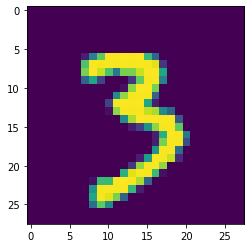

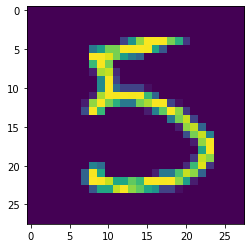

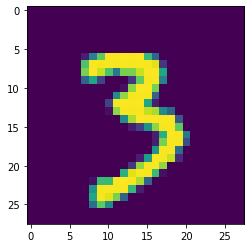

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

file1='/content/t10k-images-idx3-ubyte'
file2='/content/t10k-labels-idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[3,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
#id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
#id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)



print(data.shape)
# just for checking
# data=1-(data+10**(-12))
d=data[1,:]
im=np.reshape(d,(28,28))
plt.figure()
plt.imshow(im)
print(data)

Use the K-means clustering algorithm from the last lab to form the clusters 

In [10]:
## write your code here
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  idx=np.random.randint(0,data.shape[0],K)
  Cents=data[idx,:]


# initialized a array to store distance, assigned label, minimum distance
  DAL=np.zeros((data.shape[0],K+2))
  error=[]
  F=data+10**(-20)   # added a small value as it is a sparse matrix(many values are zero)
  


  for n in range(itr):
# assignment stage
   for i in range(F.shape[0]):
      for j in range(K):
        DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
        

      Dist=np.min(DAL[i,:K])
      
      ind=((np.where(Dist==DAL[i,:K])[0]))
      
      DAL[i,K]=ind.astype('int')
      DAL[i,K+1]=Dist

# re-estimation stage
   for i in range(K):
      ind=np.where(DAL[:,K]==i)
      
      if (F[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        Cents[i,:]=F[id1,:]
      else:
        Cents[i,:]=np.mean(F[ind,:][0],axis=0)


      

   error.append(np.mean(DAL[:,K+1]))  
   #print(Cents)



   if n>2:
      if abs(error[n]-error[n-1])<eps:
         break

   print(n)
   
  return DAL, Cents,error


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


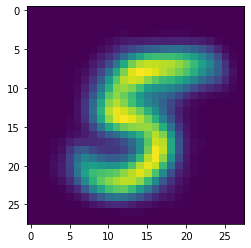

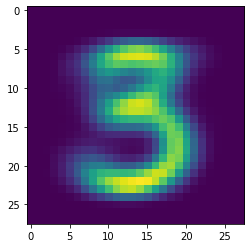

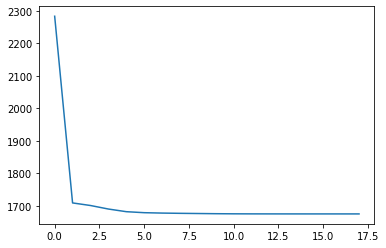

In [11]:
DAL,cents,error=K_means_clustering(data,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)

In [12]:
from sklearn import metrics

pred_lab=DAL[:,2]
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1. 1. 1. ... 0. 0. 0.]
[1. 2. 3. 4. 5.]
performance= 0.14856288541714785


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=100,max_iter=100,verbose=1)
kmeans.fit(data)

Streaming output truncated to the last 5000 lines.
Iteration 3, inertia 5496362192.677808
start iteration
done sorting
end inner loop
Iteration 4, inertia 5480528794.675383
start iteration
done sorting
end inner loop
Iteration 5, inertia 5458478502.843473
start iteration
done sorting
end inner loop
Iteration 6, inertia 5439469473.486807
start iteration
done sorting
end inner loop
Iteration 7, inertia 5427220459.7966
start iteration
done sorting
end inner loop
Iteration 8, inertia 5420589584.259232
start iteration
done sorting
end inner loop
Iteration 9, inertia 5417800393.307189
start iteration
done sorting
end inner loop
Iteration 10, inertia 5415690746.62281
start iteration
done sorting
end inner loop
Iteration 11, inertia 5414838277.311083
start iteration
done sorting
end inner loop
Iteration 12, inertia 5414653661.464726
start iteration
done sorting
end inner loop
Iteration 13, inertia 5414614851.44031
start iteration
done sorting
end inner loop
Iteration 14, inertia 5414614851.440

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

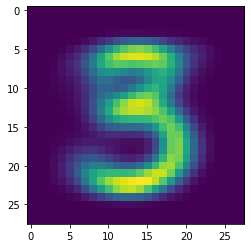

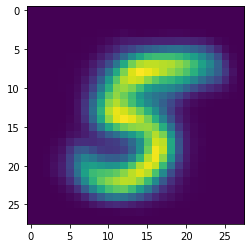

In [14]:
cents=kmeans.cluster_centers_
im=np.reshape(cents[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(cents[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [15]:
from sklearn import metrics

pred_lab=kmeans.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0 0 0 ... 1 1 1]
[1. 2. 3. 4. 5.]
performance= 0.14923696648093068


Use the GMM clustering algorithm from the last lab to form the clusters

In [16]:
## write your code here
from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)

In [17]:
gmm.fit(data)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
                verbose_interval=10, warm_start=False, weights_init=None)

In [18]:
gmm.get_params(deep=True)

{'covariance_type': 'diag',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 1,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [19]:
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

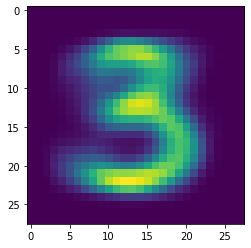

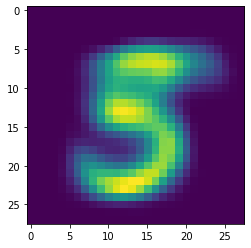

In [20]:
im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [21]:
from sklearn import metrics

pred_lab=gmm.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0 1 1 ... 0 1 1]
[1. 2. 3. 4. 5.]
performance= 0.12115544760078548
